In [1]:
!nvidia-smi

Fri Dec 29 09:12:12 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0              29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow
from roboflow import Roboflow

rf = Roboflow(api_key="hTJfCFpzTnMqVK7IIwFq")
project = rf.workspace("luigiaworkspace").project("cityscapes-zz0ur")
dataset = project.version(9).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Cityscapes-9 in yolov8:: 100%|██████████| 5294/5294 [00:01<00:00, 3800.98it/s]


In [6]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=15 imgsz=640 batch=16 optimizer=Adam lr0=0.001 lrf=0.001

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Cityscapes-9/data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

In [7]:
!ls {HOME}/runs/segment/train/

args.yaml					    results.csv       train_batch1.jpg	weights
events.out.tfevents.1703839590.23ea2a96cafa.1342.0  train_batch0.jpg  train_batch2.jpg


/content


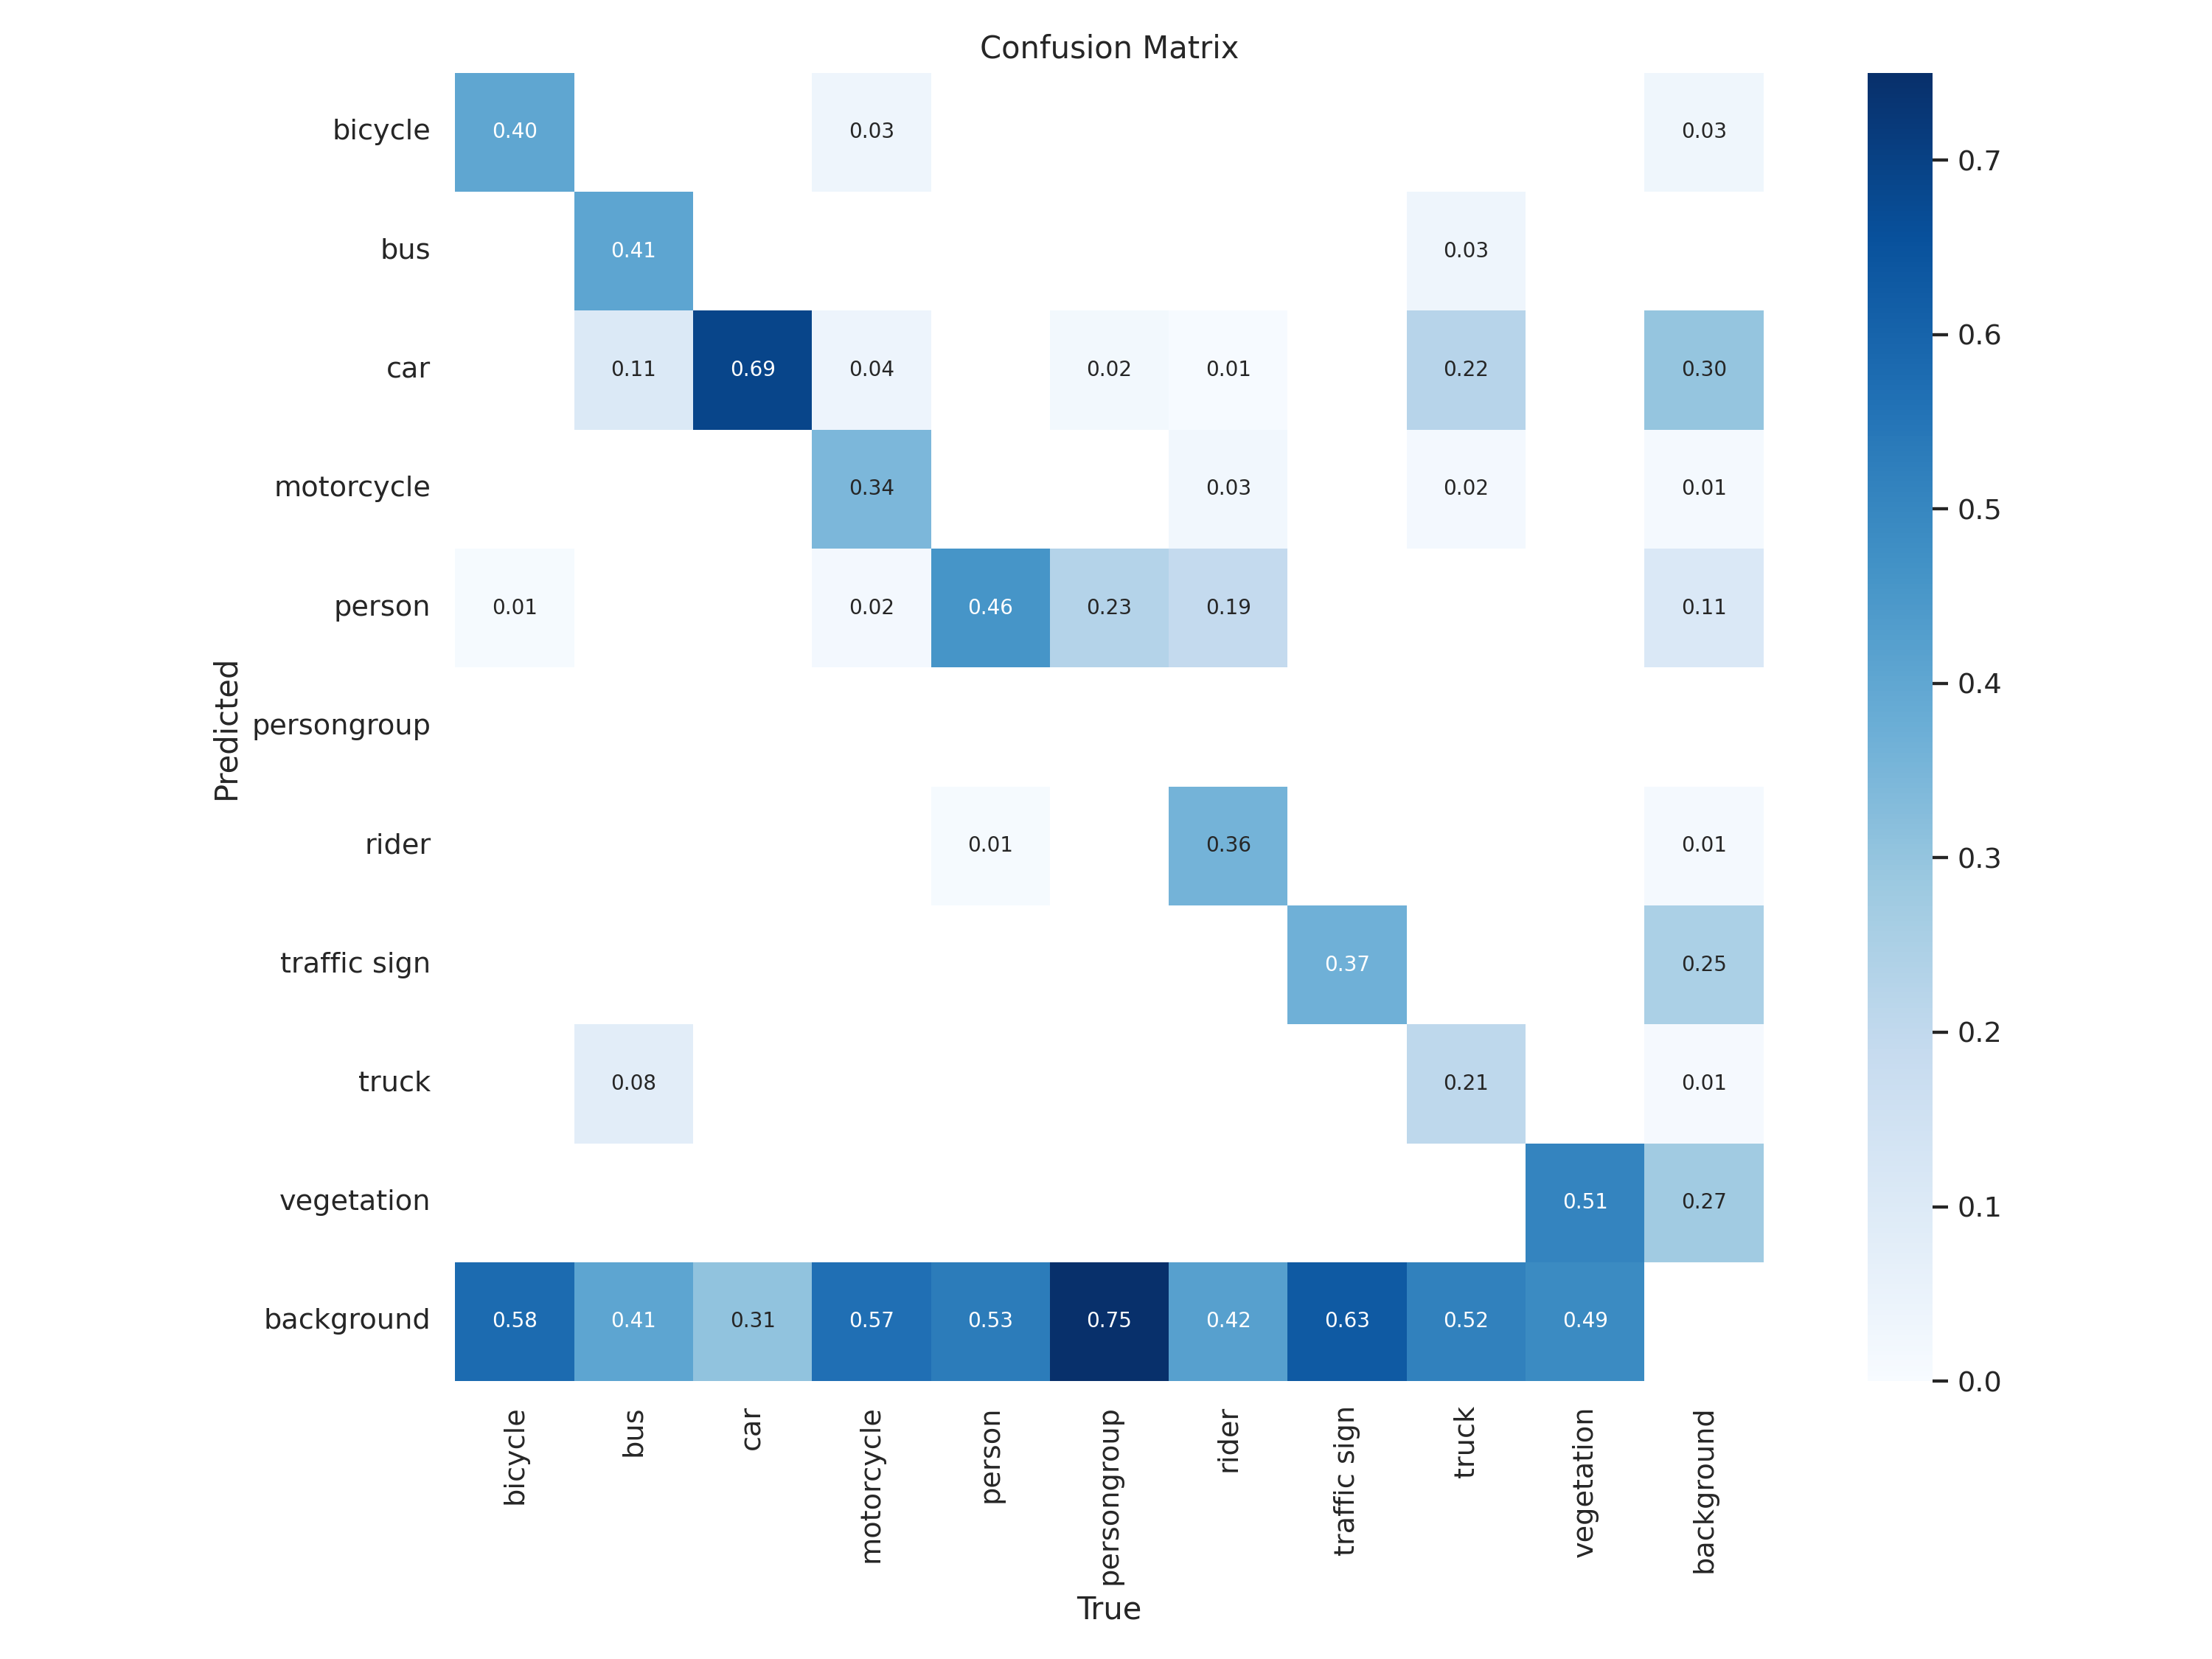

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/confusion_matrix.png', width=600)

/content


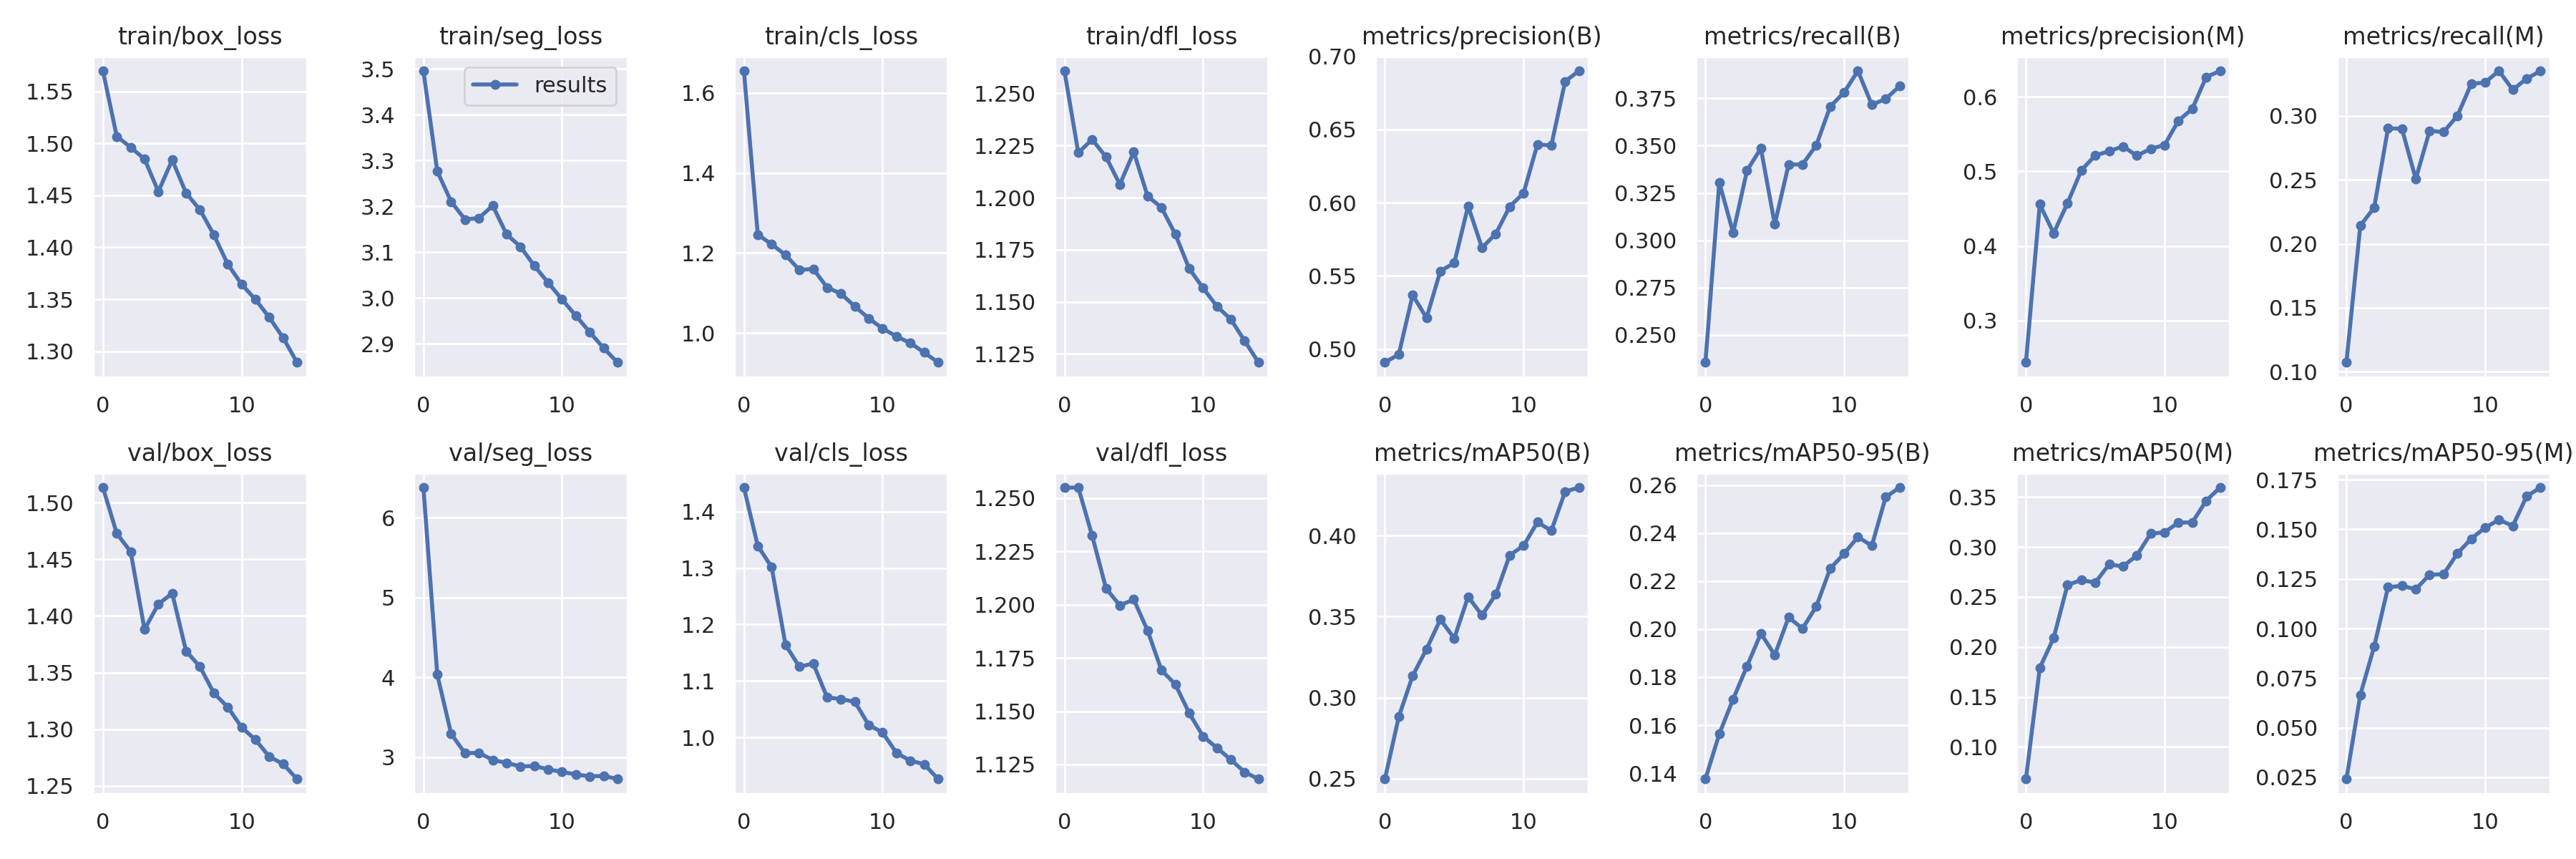

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/results.png', width=600)

/content


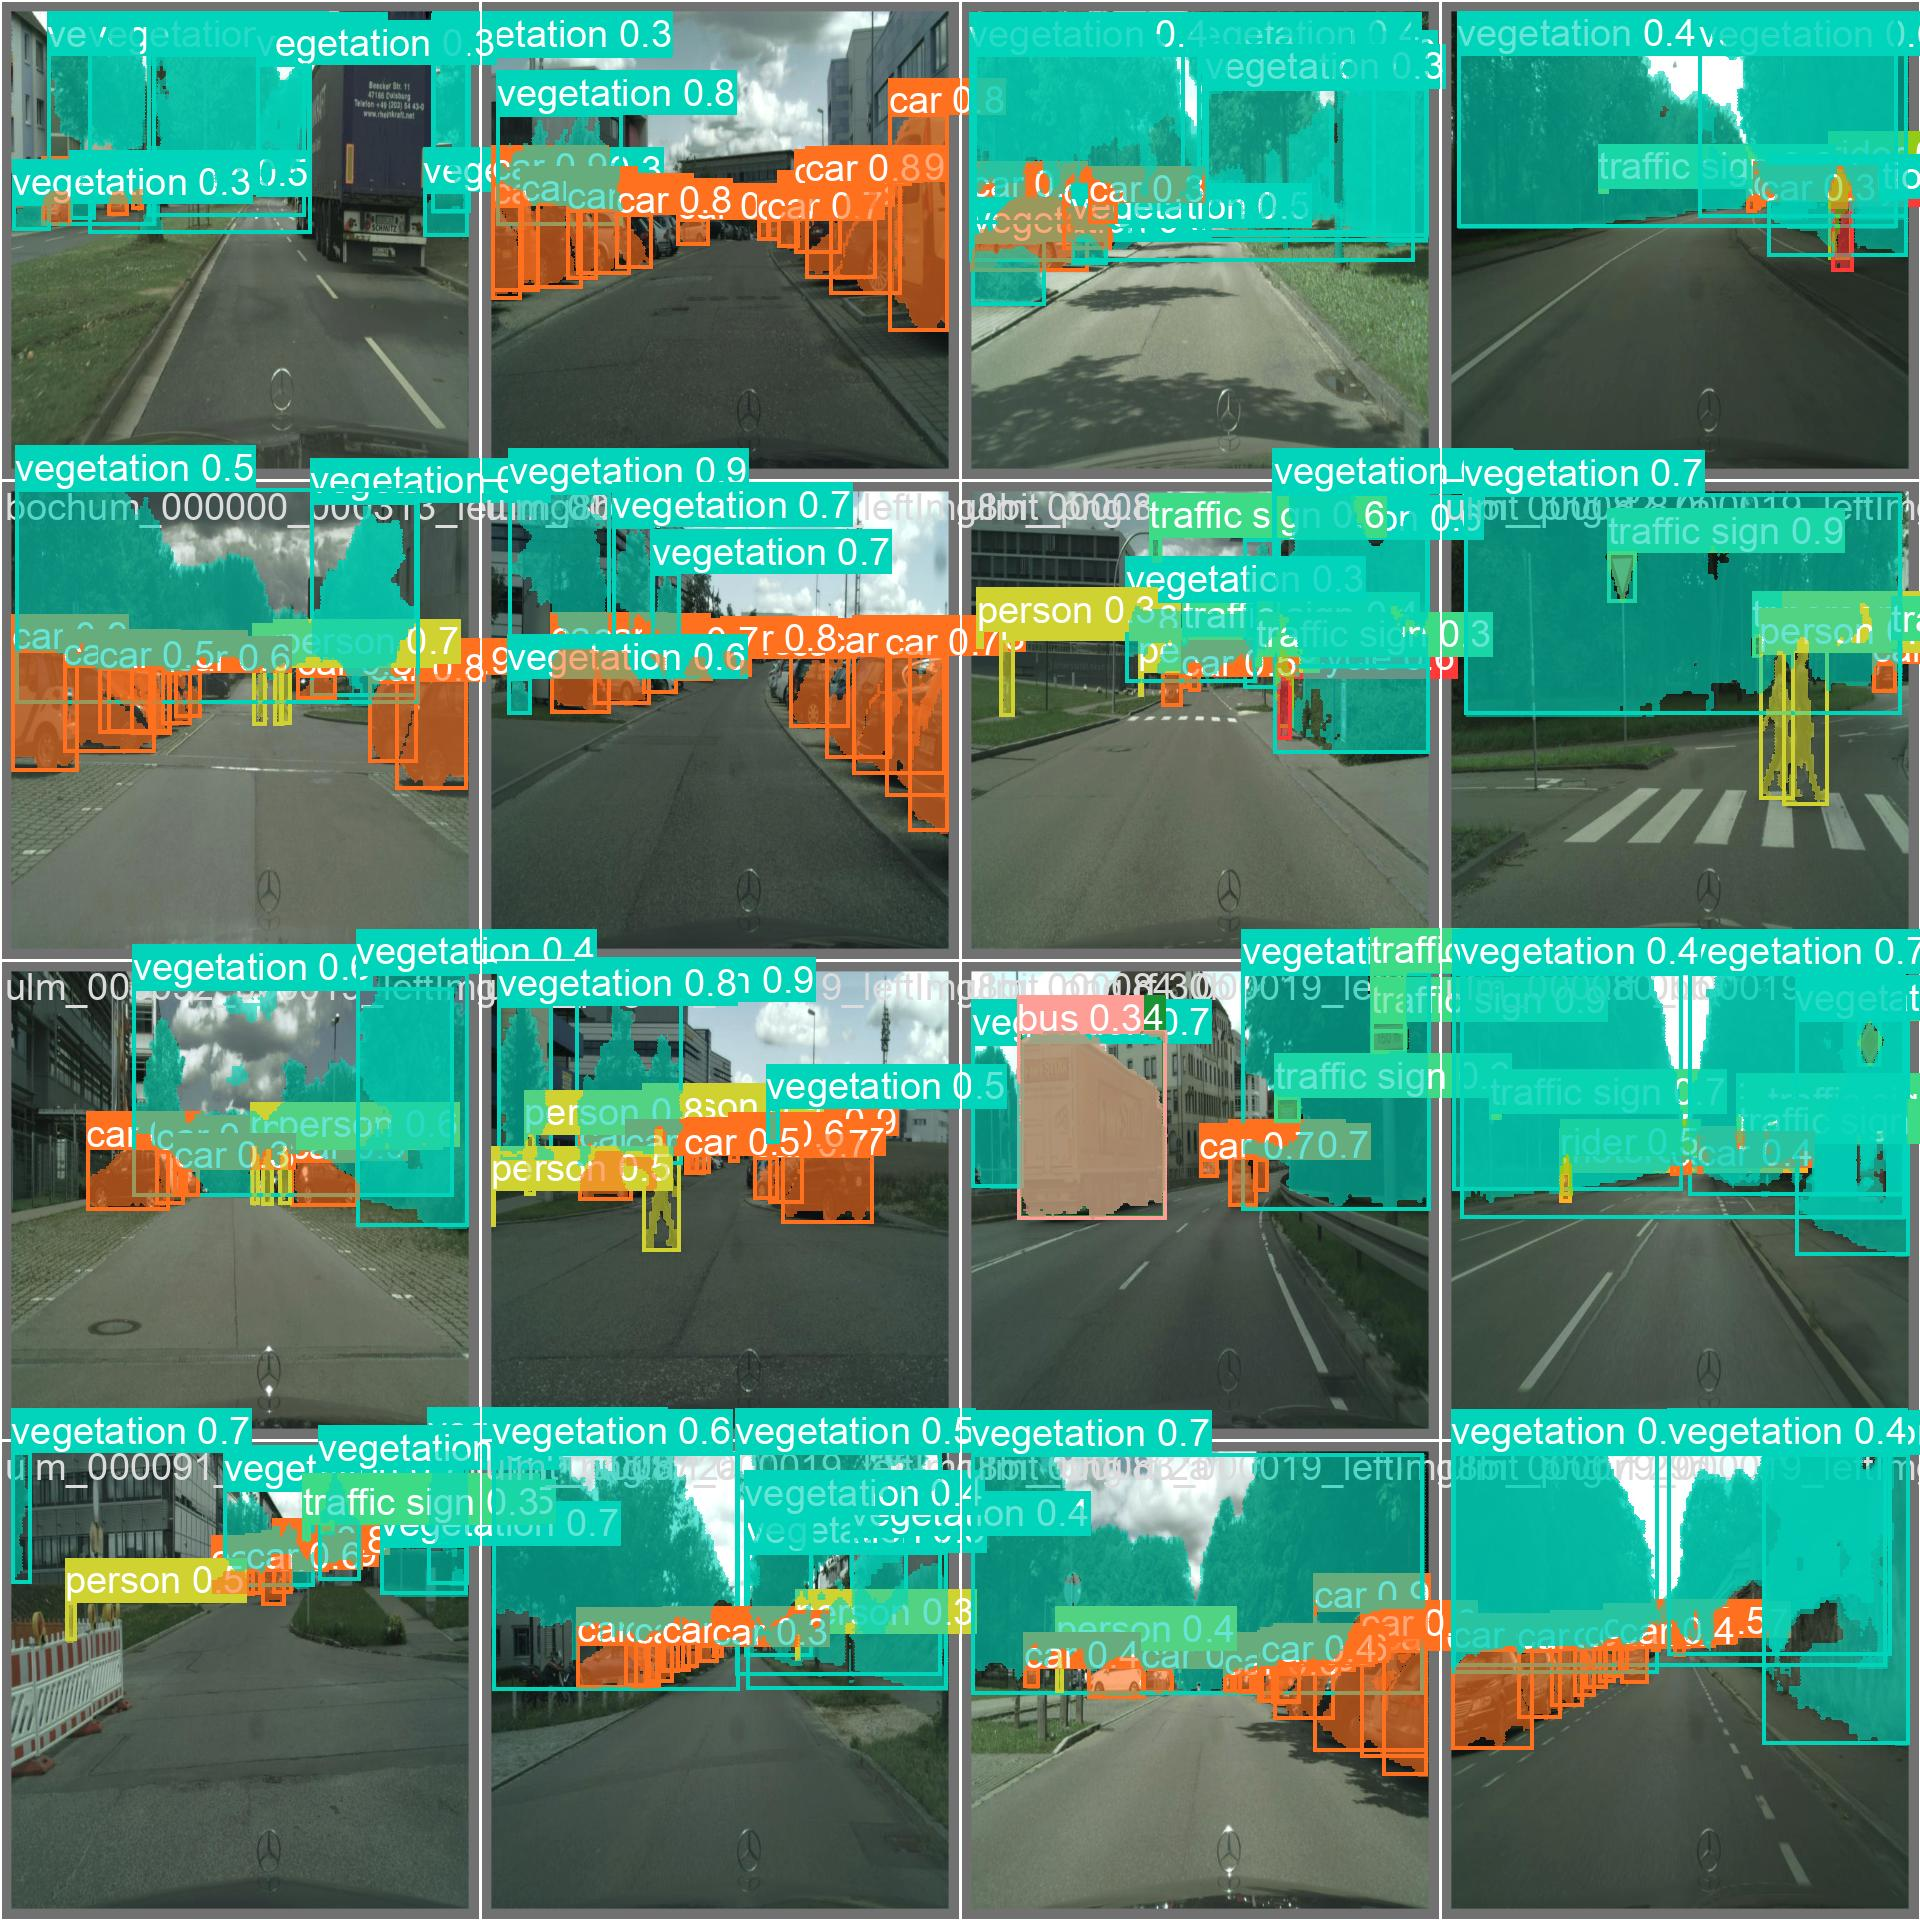

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/val_batch0_pred.jpg', width=600)

In [13]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train3/weights/best.pt data={dataset.location}/data.yaml

/content
2023-12-29 10:34:18.915676: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 10:34:18.915818: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 10:34:18.917411: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-29 10:34:20.012275: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11783470 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/datasets/Cityscapes-9/valid/labels.

In [14]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
2023-12-29 10:35:09.039028: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 10:35:09.039081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 10:35:09.040356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-29 10:35:10.094355: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11783470 parameters, 0 gradients, 42.5 GFLOPs

image 1/220 /content/datasets/Cityscapes-9/test/images/bo

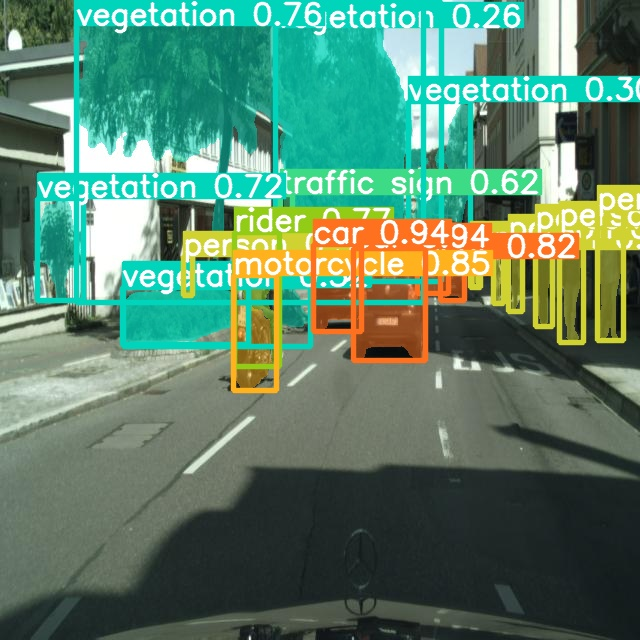

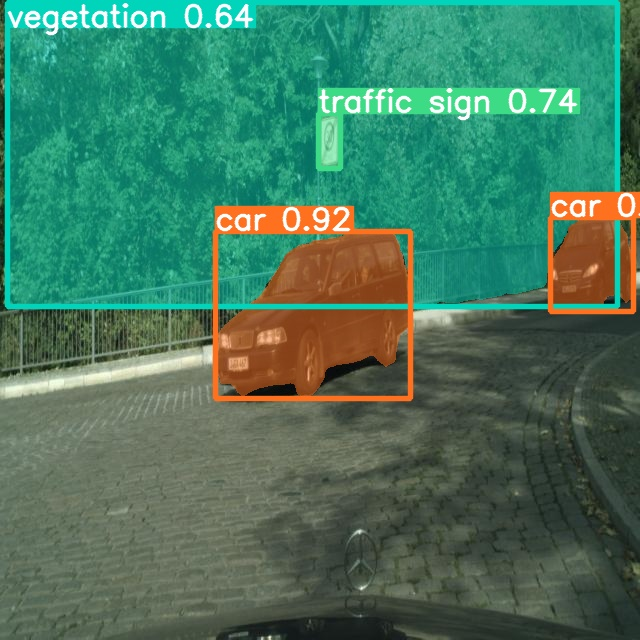

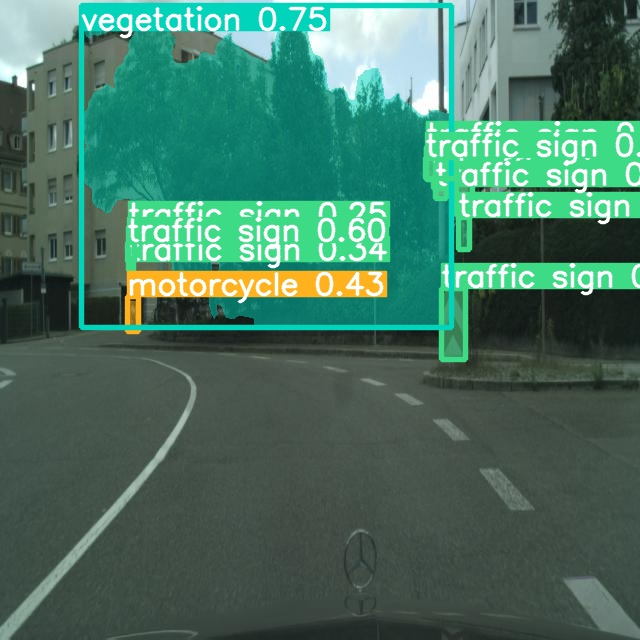

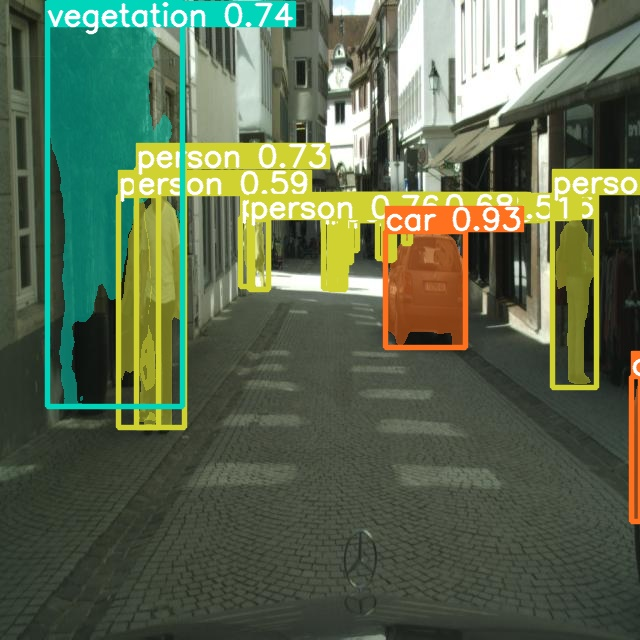

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[9:13]:
      display(Image(filename=image_path, height=600))
      print("\n")